## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [4]:
api_key = "2YY86W5ODA9UN8ZY"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [3]:
ticker = "K"

Import the appropriate libraries in the lines below each comment:

In [6]:
# pandas
import pandas as pd
# requests
import requests
# alpha_vantage TimeSeries class
from alpha_vantage.timeseries import TimeSeries 
# mmatplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [23]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=1min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=K&interval=1min&apikey=2YY86W5ODA9UN8ZY


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [8]:
K = requests.get(link)

Print the HTTP response:

In [9]:
print(K)

<Response [200]>


Print the data:

In [12]:
print(K.text)

{
    "Error Message": "Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_INTRADAY."
}


______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [13]:
ts = TimeSeries(key=api_key,output_format='pandas')

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [14]:
data, meta_data = ts.get_intraday(symbol=ticker ,interval='1min', outputsize='compact')

Print the data:

In [15]:
print(data)

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2019-09-25 14:09:00  64.1300  64.1400  64.1300   64.1400     1868.0
2019-09-25 14:10:00  64.1400  64.1460  64.1400   64.1460      384.0
2019-09-25 14:11:00  64.1407  64.1600  64.1300   64.1500     2787.0
2019-09-25 14:12:00  64.1700  64.1700  64.1500   64.1500     1058.0
2019-09-25 14:13:00  64.1500  64.1500  64.1300   64.1300     2416.0
2019-09-25 14:14:00  64.1200  64.1335  64.1200   64.1335     1293.0
2019-09-25 14:15:00  64.1300  64.1400  64.1300   64.1400      750.0
2019-09-25 14:16:00  64.1300  64.1300  64.1100   64.1200     1279.0
2019-09-25 14:17:00  64.1202  64.1300  64.1200   64.1300     2327.0
2019-09-25 14:18:00  64.1200  64.1540  64.1200   64.1540     1050.0
2019-09-25 14:19:00  64.1450  64.1450  64.1300   64.1300      823.0
2019-09-25 14:20:00  64.1600  64.1850  64.1600   64.1800     1217.0
2019-09-25 14:21:00  64.1800  64.1800  64.1600  

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

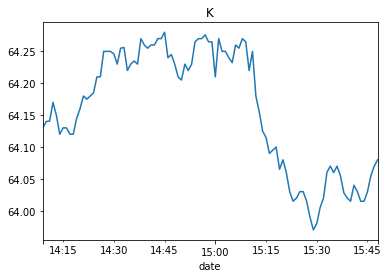

In [22]:
data['1. open'].plot() 
plt.title("K") 
plt.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [18]:
data.to_excel("my_Kellog_stock_data.xlsx")